In [5]:
%pylab inline
from sklearn import preprocessing
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [62]:
filename = "material/GlobClus_prop.limpio.dat"
data = np.genfromtxt(filename,unpack=True,skip_header=1,usecols=(5,6,7,8,9,10,11,12,13,14,15,16,17))

data = data.T

In [63]:
data_scaled = preprocessing.scale(data)

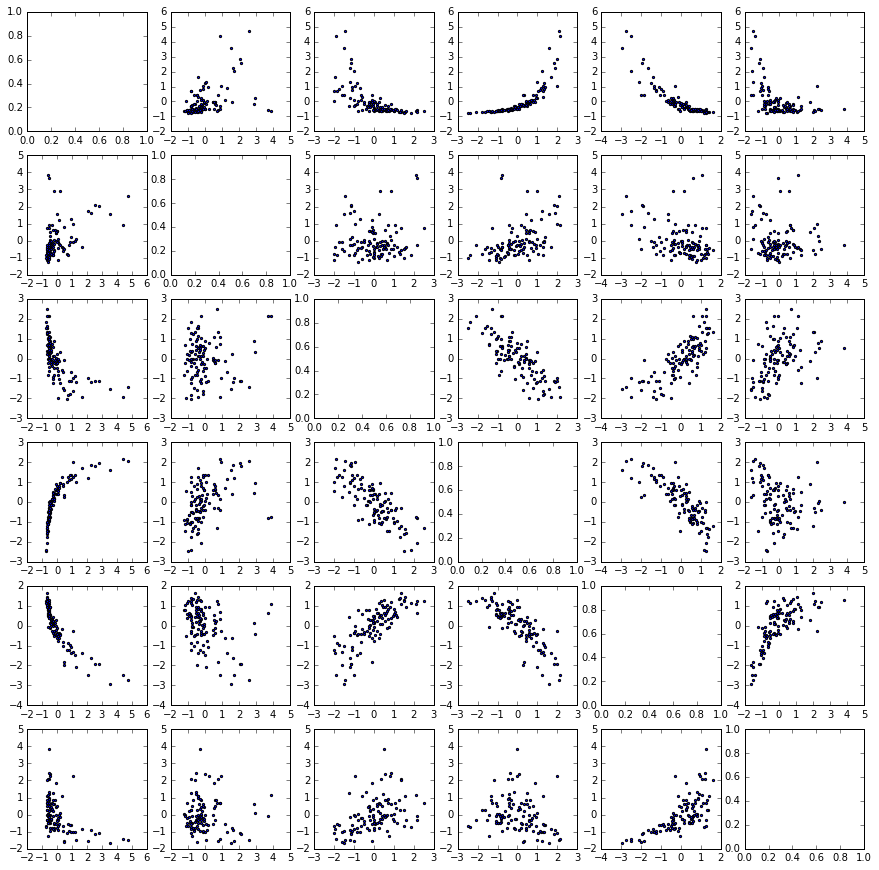

In [64]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

dyn = data_scaled.T

nrow = 6; ncol = 6;
fig, axs = plt.subplots(nrows=nrow, ncols=nrow,figsize=(15,15))
axs = np.array(axs)

for i in range(6):
    for j in range(6):
        if i == j:
            continue
        axs[j][i].scatter(dyn[i+2],dyn[j+2],s=5)

In [65]:
scaler = preprocessing.StandardScaler().fit(data)

print scaler
print scaler.mean_
print scaler.var_

StandardScaler(copy=True, with_mean=True, with_std=True)
[ -1.41369369  -7.40405405   1.72612613  39.67387387   1.53702703
   8.08837838   3.68873874   6.18018018  24.87837838  16.5245045
   0.30522523   8.52045045   9.09117117]
[  2.57535005e-01   1.53544573e+00   4.73994806e+00   7.15141750e+02
   1.62258729e-01   5.52653226e-01   1.56272634e+00   1.13463009e+01
   1.99783316e+02   2.06229142e+00   9.77600844e-02   4.16642953e+00
   4.21867520e+00]


(111, 13)
[  6.05747135e+00   2.60747746e+00   1.58285670e+00   1.37421543e+00
   7.75415475e-01   3.37319460e-01   2.05269184e-01   1.12023530e-01
   6.37902666e-02   1.61140588e-03   6.58307477e-04   7.32452434e-05
   1.54951581e-31]
[  2.58132107e+01   1.69358354e+01   1.31952354e+01   1.22948647e+01
   9.23556724e+00   6.09139891e+00   4.75180074e+00   3.51035444e+00
   2.64894872e+00   4.21016207e-01   2.69098165e-01   8.97606638e-02
   4.12851958e-15]


<Container object of 13 artists>

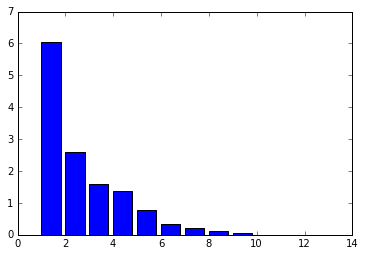

In [66]:
from sklearn import decomposition

print data_scaled.shape

pca = decomposition.PCA(n_components=13)
pca.fit(data_scaled)
var = pca.explained_variance_
autovalores = pca.singular_values_
print(var)
print(autovalores)
plt.bar(np.arange(1,14),var)

In [70]:
V = pca.components_
print V[0]
print V[1]

[ 0.00043378  0.28579213  0.32826121  0.08598645 -0.30728243  0.2589918
 -0.38310757 -0.33738032 -0.3484745   0.15722781 -0.06152069  0.28411153
  0.38783789]
[-0.20890935 -0.35617565  0.26053991  0.43996502 -0.07976548  0.39794983
 -0.19194829  0.15078984  0.1414379  -0.13899714 -0.44261686 -0.31401278
 -0.09949177]


In [68]:
Y = pca.transform(data_scaled)

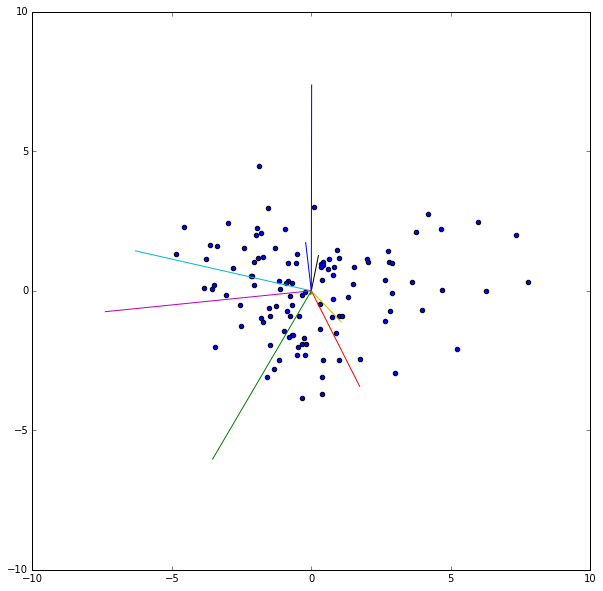

In [69]:
xx = (Y.T)[0]
yy = (Y.T)[1]

f = plt.figure(figsize=(10,10))
plt.scatter(xx,yy)
plt.xlim(-10.0,10.0)
plt.ylim(-10.0,10.0)

for i in range(13):
    _x = V[i]*autovalores[i]
    plt.plot([0,_x[0]],[0,_x[1]])

 # Versión a "mano"

In [112]:
mean = data.mean(axis=0)
std = data.std(axis=0)

datos = (data - mean)/std
datos = datos.T

ndim = datos.shape[0]
ndatos = datos.shape[1]

In [90]:
from numpy import linalg as LA

In [95]:
u, s, vh = LA.svd(datos, full_matrices=True)

In [108]:
print "Autovalores"
print s

print "Autovectores"
print vh

Autovalores
[  2.58132107e+01   1.69358354e+01   1.31952354e+01   1.22948647e+01
   9.23556724e+00   6.09139891e+00   4.75180074e+00   3.51035444e+00
   2.64894872e+00   4.21016207e-01   2.69098165e-01   8.97606638e-02
   8.73314771e-15]
Autovectores
[[ -4.33783187e-04  -2.85792128e-01  -3.28261209e-01  -8.59864543e-02
    3.07282435e-01  -2.58991798e-01   3.83107566e-01   3.37380318e-01
    3.48474501e-01  -1.57227809e-01   6.15206932e-02  -2.84111530e-01
   -3.87837891e-01]
 [ -2.08909349e-01  -3.56175650e-01   2.60539915e-01   4.39965017e-01
   -7.97654822e-02   3.97949831e-01  -1.91948287e-01   1.50789842e-01
    1.41437904e-01  -1.38997141e-01  -4.42616859e-01  -3.14012776e-01
   -9.94917679e-02]
 [  1.31347973e-01  -2.59474566e-01   1.47974643e-01   2.03734274e-01
   -1.41926961e-02   1.35769840e-01   2.99571392e-02   3.20242309e-01
    3.14128592e-01   6.56918041e-01   3.19300417e-01   3.04654656e-01
    7.03118735e-02]
 [  5.12513492e-01  -1.16427821e-01   1.81483153e-02  -4.04

In [109]:
datos[0]

array([ 1.30782476, -1.79637656, -0.56318147,  0.77129693,  1.34795123,
       -0.29375366,  1.06493188,  2.06916157,  2.25842325, -1.71614745,
       -0.84826987, -2.29790745, -1.7240858 ])

In [113]:
print datos.shape
print vh.shape

(13, 111)
(13, 13)


In [131]:
projection = np.matmul(vh,datos)

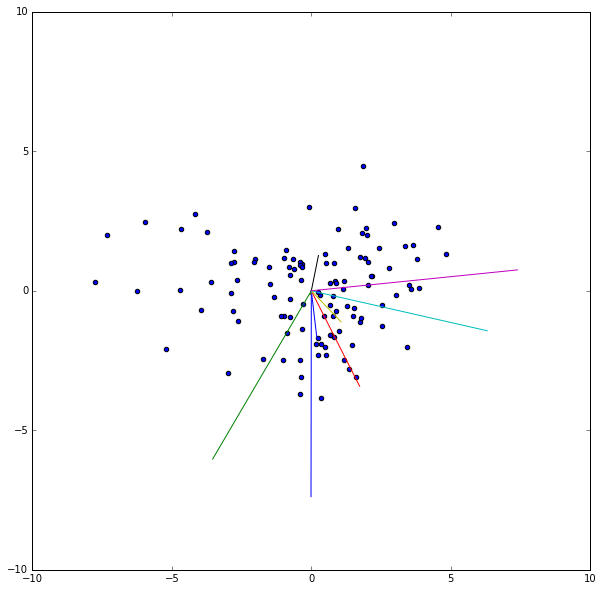

In [132]:
xx = projection[0]
yy = projection[1]

f = plt.figure(figsize=(10,10))
plt.scatter(xx,yy)
plt.xlim(-10.0,10.0)
plt.ylim(-10.0,10.0)

for i in range(13):
    _x = vh[i]*s[i]
    plt.plot([0,_x[0]],[0,_x[1]])